# **DSBA/MBAD 6201 Assignment:** Data Exploration and Multiple Linear Regression



# Load Data

In [1]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'auto_mpg_edit.csv', 'Sanders_D_LinearRegression.ipynb']


In [2]:
import pandas as pd #import package
df = pd.read_csv('auto_mpg_edit.csv') #load the csv file

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car name
0,18.0,8,307.0,130,3504,12.0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   car name      392 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 21.6+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


# Data Preprocessing

In [6]:
df.drop(columns=['car name'], inplace=True) # drop the 'car name' column because it is not useful

## 1a. Generate box-plot for the horsepower and acceleration attributes and identify the cutoff values for outliers. (2 pts)

C:\Users\DS84293\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


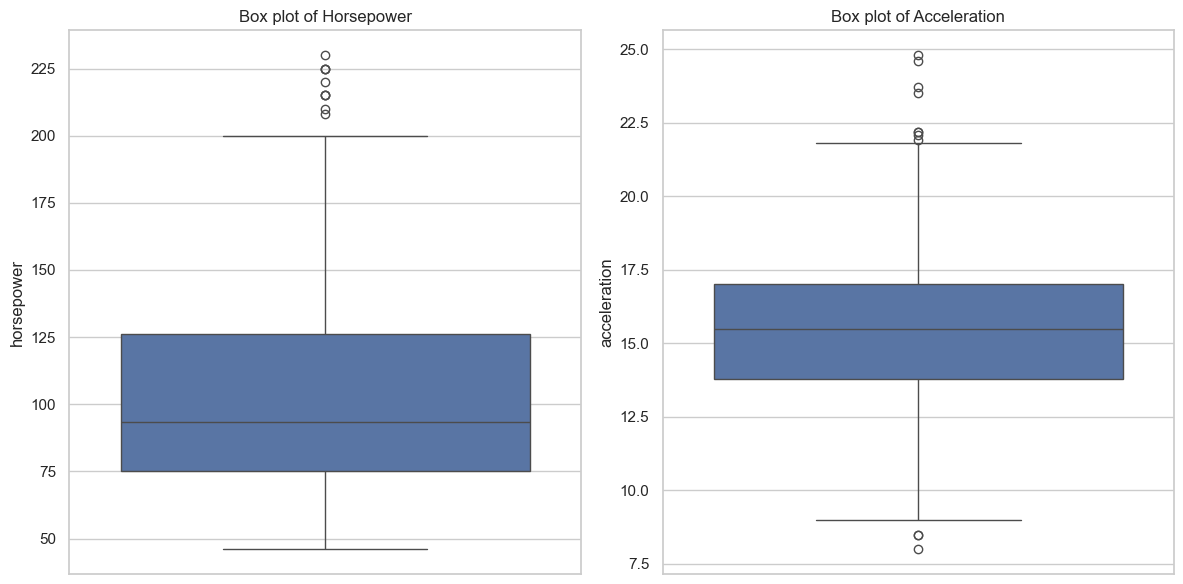

Horsepower outliers are below -1.5 or above 202.5.
Acceleration outliers are below 8.900000000000002 or above 21.899999999999995.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Creating box plots for horsepower and acceleration
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Horsepower box plot
sns.boxplot(data=df, y="horsepower", ax=axs[0])
axs[0].set_title('Box plot of Horsepower')

# Acceleration box plot
sns.boxplot(data=df, y="acceleration", ax=axs[1])
axs[1].set_title('Box plot of Acceleration')

plt.tight_layout()
plt.show()

# Calculate and print the cutoff values for outliers for both horsepower and acceleration

# Horsepower
Q1_hp, Q3_hp = df['horsepower'].quantile([0.25, 0.75])
IQR_hp = Q3_hp - Q1_hp
outlier_low_hp = Q1_hp - 1.5 * IQR_hp
outlier_high_hp = Q3_hp + 1.5 * IQR_hp

# Acceleration
Q1_acc, Q3_acc = df['acceleration'].quantile([0.25, 0.75])
IQR_acc = Q3_acc - Q1_acc
outlier_low_acc = Q1_acc - 1.5 * IQR_acc
outlier_high_acc = Q3_acc + 1.5 * IQR_acc

print(f'Horsepower outliers are below {outlier_low_hp} or above {outlier_high_hp}.')
print(f'Acceleration outliers are below {outlier_low_acc} or above {outlier_high_acc}.')


## 1b. Genrate a scatterplot for acceleration against horsepower. (2 pts)

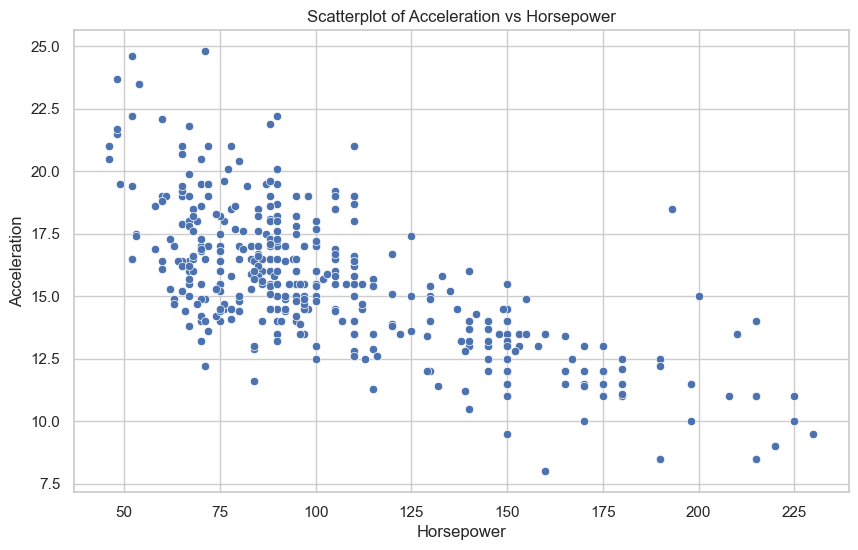

In [8]:
# Generate a scatterplot for acceleration against horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='horsepower', y='acceleration')
plt.title('Scatterplot of Acceleration vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.show()

## 1c. Comment on how inclusion of the outliers would affect a predictive model of 'mpg' as a function of 'acceleration'. (2 pt)

Inclusion of outliers in a predictive model of 'mpg' as a function of 'acceleration' can significantly impact its accuracy and reliability. Outliers can skew the model, leading to increased prediction errors, reduced performance on unseen data, and potential biases in the estimates.

## 2. 'mpg' has a somewhat longish tail and is not precisely normally distributed, so we will take a log transformation, ( use df['lmpg'] = df['mpg'].apply(np.log) ), and then predict 'lmpg' instead. (You should convince yourself that this is a better idea by looking at the histograms to assess normality; however no need to submit such plots.) (2 pt)

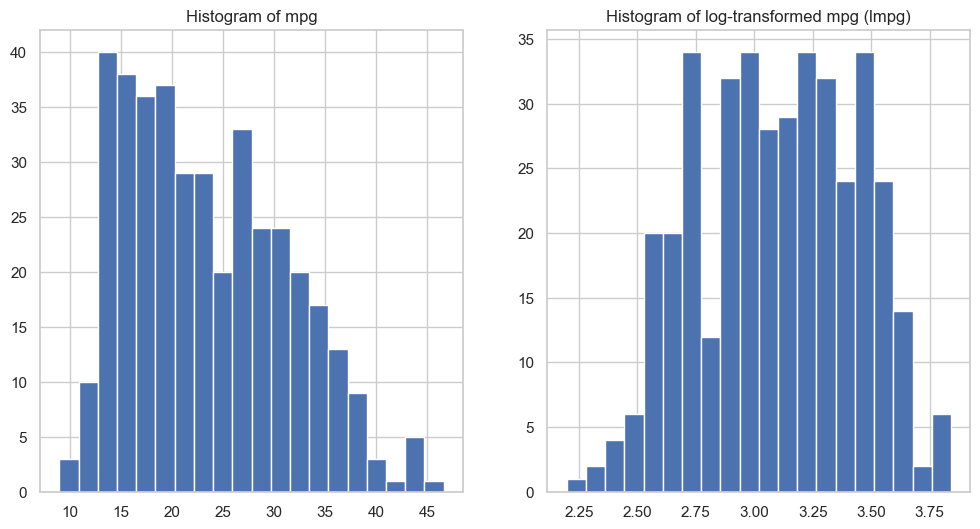

In [9]:

import numpy as np
import pandas as pd

df['lmpg'] = df['mpg'].apply(np.log)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
df['mpg'].hist(ax=axs[0], bins=20)
axs[0].set_title('Histogram of mpg')
df['lmpg'].hist(ax=axs[1], bins=20)
axs[1].set_title('Histogram of log-transformed mpg (lmpg)')
plt.show()


Applying the logarithm compresses the data and helps ignore the outliers
closer to a normal distribution.

## Split the data into train and test sets

In [10]:
from sklearn.model_selection import train_test_split # import the needed package

# Specify the independent variables (X) and dependent variable (Y)
X = df[['cylinders',	'displacement',	'horsepower',	'weight',	'acceleration']]
y =df['lmpg']

seed = 0  # Assign a seed value.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


# Regression analysis and assesment

## 3. Try to fit an MLR to this dataset, with 'lmpg' as the dependent variable. Use all the available variables in your model. (4 pts)

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Apply the log transformation to 'mpg' to create 'lmpg'
df['lmpg'] = np.log(df['mpg'])

# Define the independent variables (X) and the dependent variable (y)
# Here we're using all available variables as predictors except 'mpg' itself and 'car name'
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['lmpg']

# Split the dataset into training and testing sets
seed = 0  # Seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Initialize and fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared Value: {r2}')


C:\Users\DS84293\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Mean Squared Error (MSE): 0.024878082027346173
R-squared Value: 0.78920355609916


C:\Users\DS84293\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


## 4. Report the coefficients obtained by your model. Would you drop any of the variables used in your model (based on the t-scores or p-values)? (5 pts)


In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame after log transformation has been applied
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['lmpg']

# Splitting the data (Assuming this has not been done in the current context)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the MLR model
model = LinearRegression()
model.fit(X_train, y_train)

# Obtaining coefficients
coefficients = model.coef_

# Calculating F-statistics and p-values
F, p_values = f_regression(X_train, y_train)

# Compiling the results into a DataFrame
results_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients,
    'F-Statistic': F,
    'p-value': p_values
})

print(results_df)


       Variable  Coefficient  F-Statistic        p-value
0     cylinders    -0.023825   637.939444   2.537583e-77
1  displacement     0.000084   799.153569   6.211888e-88
2    horsepower    -0.002413   657.220272   1.106484e-78
3        weight    -0.000229  1036.674759  4.847581e-101
4  acceleration    -0.001539    68.377573   3.979148e-15


C:\Users\DS84293\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\DS84293\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


## 5. Report the MSE obtained on X_train. Score your model (i.e., predict) on X_test. Also report how much the MSE changes. (3 pts)


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Log-transform 'mpg' and define predictors and the response variable
df['lmpg'] = np.log(df['mpg'])
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['lmpg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit the Linear Regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training data and calculate MSE
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)

# Predict on the testing data and calculate MSE
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate the change in MSE
mse_change = mse_test - mse_train

# Report the MSE for the training set, testing set, and the change in MSE
print(f"MSE on training set: {mse_train}")
print(f"MSE on testing set: {mse_test}")
print(f"Change in MSE from training to testing: {mse_change}")


MSE on training set: 0.02395066247987542
MSE on testing set: 0.024878082027346173
Change in MSE from training to testing: 0.0009274195474707515


C:\Users\DS84293\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\DS84293\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\DS84293\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


## 6. Bonus Question. Use the stepwise regression to reach your final model. Try different model selection criteria (i.e., AIC, BIC, Adj R^2) and see if you can come up with the same model even with the different criteria. Determine the best model if you get different models with different criteria. (Consider a model that gives the lowest MSE on the test set as the best model) (2 pts).

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

DEBUG = False

# Load the CSV file
data = pd.read_csv('auto_mpg_edit.csv') 

# Drop the 'car name' column because it is not useful
data.drop(columns=['car name'], inplace=True) 

# Log-transform 'mpg' and define predictors and the response variable
data['lmpg'] = np.log(data['mpg'])

# Example selected_columns based on AIC criteria, adjust accordingly
selected_columns = ['weight', 'horsepower', 'cylinders', 'displacement', 'acceleration']  

# Add constant for intercept in model training and predictions
X = sm.add_constant(data[selected_columns])

X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = data['lmpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
if DEBUG:print(X_train, X_test, y_train, y_test)

# Stepwise regression function
def stepwise_selection(X, y, criteria):
    selected_columns = []
    best_model = None
    best_mse = np.inf
    if DEBUG:print(X, y, criteria)
    while True:
        candidate_columns = [col for col in X.columns if col not in selected_columns]
        if DEBUG:print('candidate_columns:',candidate_columns)
        if len(candidate_columns) == 0:
            break
        
        best_candidate = None
        for col in candidate_columns:
            if DEBUG:print('col:',col)
            model_columns = selected_columns + [col]
            X_subset = X[model_columns]
            model = sm.OLS(y, X_subset).fit()
            if DEBUG:print('model:',model)
            if criteria == 'AIC':
                if best_candidate is None or model.aic < best_candidate.aic:
                    best_candidate = model
            elif criteria == 'BIC':
                if best_candidate is None or model.bic < best_candidate.bic:
                    best_candidate = model
            elif criteria == 'Adj_R2':
                if best_candidate is None or model.rsquared_adj > best_candidate.rsquared_adj:
                    best_candidate = model
        
        selected_columns.append(best_candidate.params.index[-1])
        if mean_squared_error(y_test, best_candidate.predict(X_test[selected_columns])) < best_mse:
            best_mse = mean_squared_error(y_test, best_candidate.predict(X_test[selected_columns]))
            best_model = best_candidate
            
    return best_model, selected_columns

# Perform stepwise regression with different criteria
criteria_list = ['AIC', 'BIC', 'Adj_R2']
best_models = {}
for criteria in criteria_list:
    best_model, selected_columns = stepwise_selection(X_train, y_train, criteria)
    best_models[criteria] = (best_model, selected_columns)

# Select the best model based on the lowest MSE on the test set
best_criteria = None
best_mse = np.inf
for criteria, (model, selected_columns) in best_models.items():
    mse = mean_squared_error(y_test, model.predict(X_test[selected_columns]))
    if mse < best_mse:
        best_criteria = criteria
        best_mse = mse

best_model, selected_columns = best_models[best_criteria]

# Print the best model and selected features
print("Best Model (based on {}):".format(best_criteria))
print(best_model.summary())
print("Selected Features:")
print(selected_columns)


Best Model (based on AIC):
                                 OLS Regression Results                                
Dep. Variable:                   lmpg   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              4108.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):                   1.77e-279
Time:                        08:14:22   Log-Likelihood:                         -140.85
No. Observations:                 313   AIC:                                      291.7
Df Residuals:                     308   BIC:                                      310.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
------------